## Metric #2: Traffic

### Sumukh Desabhotla

In [18]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt

In [19]:
traffic = pd.read_csv("TrafficCount.csv")

num_traffic = traffic.groupby("neighborhood").sum()['average_daily_car_traffic']
num_traffic.sort_values(ascending=False)
print(num_traffic.head(60))

neighborhood
Allegheny Center              2386.0
Allegheny West                 477.0
Arlington                     4571.0
Banksville                       0.0
Beechview                     4255.0
Beltzhoover                   1577.0
Bloomfield                   43101.0
Bluff                         5365.0
Brighton Heights              7547.0
Brookline                    39144.0
California-Kirkbride         14926.0
Carrick                      13787.0
Central Business District     2305.0
Central Lawrenceville        13499.0
Central Northside             5945.0
Central Oakland              11306.0
Chartiers City                2571.0
Chateau                          0.0
Crafton Heights              11500.0
Crawford-Roberts                 0.0
Duquesne Heights              5831.0
East Allegheny                1924.0
East Hills                   16253.0
East Liberty                 51247.0
Elliott                       4028.0
Fineview                       419.0
Friendship               

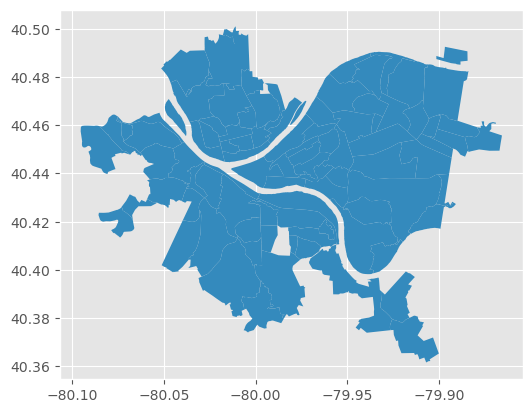

In [20]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe
plt.style.use('ggplot')
plt.show()

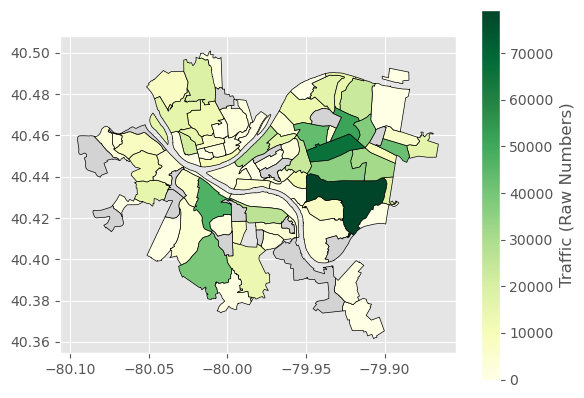

In [32]:
# do the merge
traffic_map = neighborhoods.merge(num_traffic, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
traffic_map[['hood','average_daily_car_traffic','geometry']].head()
traffic_map.plot(column='average_daily_car_traffic', # set the data to be used for coloring
               cmap='YlGn',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Traffic (Raw Numbers)"}, # label the legend
                        # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )
plt.show()

In [31]:
top = num_traffic.sort_values(ascending=True).head(60)
top

neighborhood
Middle Hill                      0.0
Crawford-Roberts                 0.0
South Oakland                    0.0
Banksville                       0.0
Upper Lawrenceville              0.0
Chateau                          0.0
Oakwood                          0.0
Troy Hill                        0.0
Swisshelm Park                   0.0
South Shore                      0.0
South Side Flats               115.0
Lincoln Place                  126.0
Lincoln-Lemington-Belmar       195.0
Fineview                       419.0
Allegheny West                 477.0
New Homestead                  666.0
Overbrook                      777.0
Summer Hill                    937.0
Spring Garden                 1226.0
Beltzhoover                   1577.0
East Allegheny                1924.0
Central Business District     2305.0
Allegheny Center              2386.0
St. Clair                     2436.0
Chartiers City                2571.0
Hazelwood                     2579.0
West Oakland             

In [30]:
top = num_traffic.sort_values(ascending=True).head(10)
top

neighborhood
Middle Hill            0.0
Crawford-Roberts       0.0
South Oakland          0.0
Banksville             0.0
Upper Lawrenceville    0.0
Chateau                0.0
Oakwood                0.0
Troy Hill              0.0
Swisshelm Park         0.0
South Shore            0.0
Name: average_daily_car_traffic, dtype: float64